# Graded: x of 40 correct
- [10] Contains correct number of plots (1 pt each, 10 pts total)
- [10] Contains correct layout (1 pt each, 10 pts total)
- [10] Each plot contains correct data (1 pt each, 10 pts total)
- [10] Titles, labels, and axes (1 pt each, 10 pts total)

Comments: 


# Assignment 3: Constructing a visual report with Matplotlib
You are performing an analysis of fuel efficiency in personal vehicles from model years 1970 - 1980. You have extracted the following data in `list` form:
- `all_mpgs`: Fuel economy (miles per gallon) for all selected vehicle models across all years
- `all_weights`: Weights (lbs) for all selected vehicle models across all years
- `unique_model_years`: A list of model years from 1970 to 1980
- `yearly_mean_mpgs`: Average fuel economy (miles per gallon) for vehicles in each model year
- `yearly_mean_horsepower`: Average engine power (horsepower) for vehicles in each model year
- `origins_1970`: The origin for each vehicle from the 1970 model year
- `origins_1980`: The origin for each vehicle from the 1980 model year
- `origin_mean_mpgs`: Average fuel economy (miles per gallon) for vehicles from each origin
- `origin_mean_horsepower`: Average engine power (horsepower) for vehicles from each origin
- `origin_mean_cylinders`: Average number of engine cylinders for vehicles from each origin
- `origin_mean_displacement`: Average cylinder volume (cm^3) for vehicles from each origin
- `origin_mean_weight`: Average weight (lbs) for vehicles from each origin
- `origin_mean_acceleration`: Average acceleration (ft/s^2) for vehicles from each origin

Your task is to create a visual report for these data. You will create a single Matplotlib Figure containing the following subplots:
1. A scatter plot with `all_weights` on the x-axis and `all_mpgs` on the y-axis
2. A line plot with `unique_model_years` with **separate** y-axes for `yearly_mean_mpgs` and `yearly_mean_horsepower`. Include markers for each data point.
3. Two pie charts, one each for the number of models by origin in `origins_1970` and `origins_1980`
4. A series of 6 bar plots with `origin_mean_mpgs`, `origin_mean_horsepower`, `origin_mean_cylinders`, `origin_mean_displacement`, `origin_mean_weight`, and `origin_mean_acceleration` on y-axis, and each should have `unique_origins` on the x-axis.

The subplots should use a layout with 3 rows:
- Row 1, three subplots: Scatter plot (item 1 above), 2 pie charts (item 3)
- Row 2, 1 subplot stretched across the figure: Line plot (item 2)
- Row 3, 6 subplots: 6 bar plots (item 4)

Be sure to give each subplot a title and label the axes with appropriate descriptor and units. You may customize the appearance (colors, marker types, etc.) in any way you think looks appealing
<br />
<br />
The next cell loads the data and should not be changed.

In [6]:
# Do not change this cell
import pandas as pd
import seaborn as sns

data = sns.load_dataset('mpg')

all_mpgs = data['mpg'].to_list()
all_weights = data['weight'].to_list()

unique_model_years = list(data['model_year'].unique())
unique_origins = sorted(list(data['origin'].unique()))

yearly_mean_mpgs = data.groupby('model_year').mean(numeric_only=True)['mpg'].to_list()
yearly_mean_horsepower = data.groupby('model_year').mean(numeric_only=True)['horsepower'].to_list()

origins_1970 = data.loc[data['model_year'] == 70, 'origin']
origins_1980 = data.loc[data['model_year'] == 80, 'origin']

origin_mean_mpgs = data.groupby('origin').mean(numeric_only=True)['mpg'].to_list()
origin_mean_horsepower = data.groupby('origin').mean(numeric_only=True)['horsepower'].to_list()
origin_mean_cylinders = data.groupby('origin').mean(numeric_only=True)['cylinders'].to_list()
origin_mean_displacement = data.groupby('origin').mean(numeric_only=True)['displacement'].to_list()
origin_mean_weight = data.groupby('origin').mean(numeric_only=True)['weight'].to_list()
origin_mean_acceleration = data.groupby('origin').mean(numeric_only=True)['acceleration'].to_list()


C:\Users\Nguyen\AppData\Local\Temp\ipykernel_4576\1805485380.py:28: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax2 = plt.subplot2grid((3, 3), (1, 0), colspan=3)


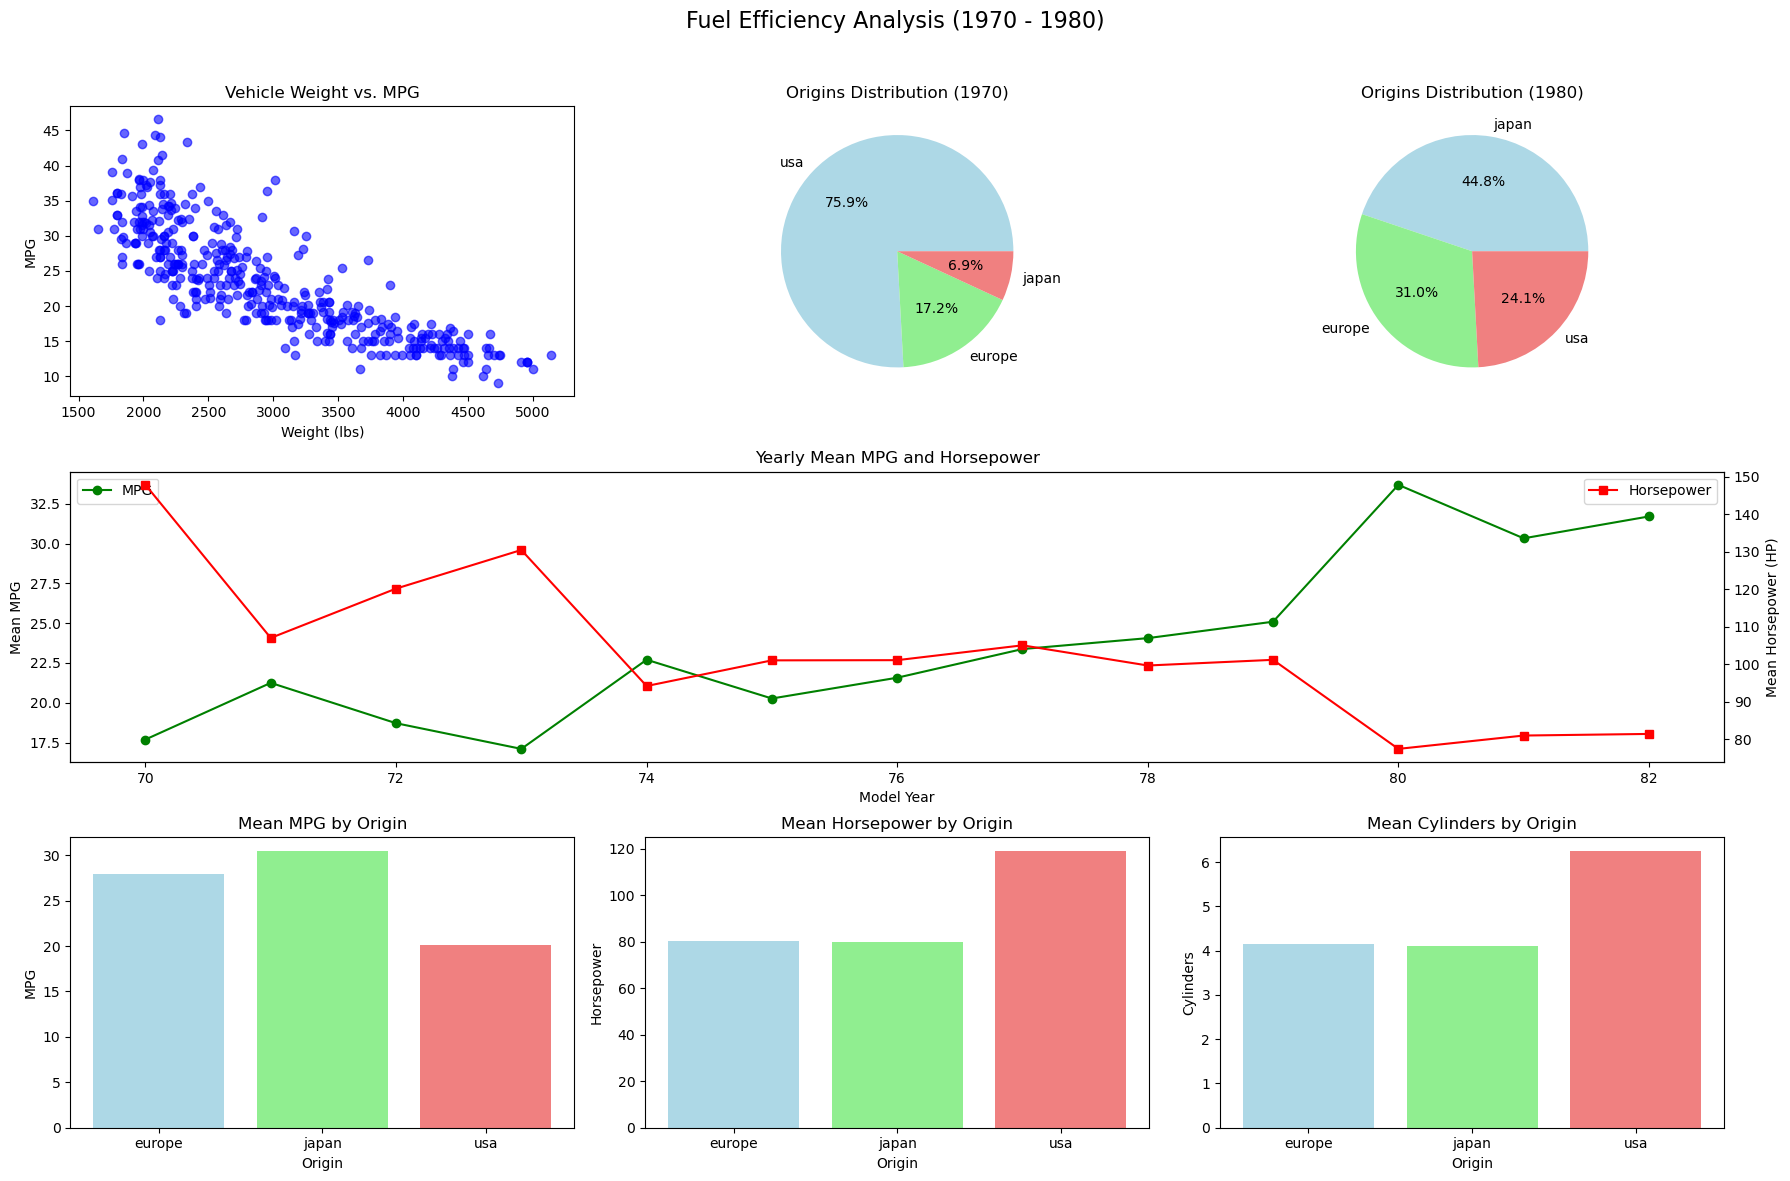

In [7]:
import matplotlib.pyplot as plt

# Set up the figure and the 3x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(18, 12))
fig.suptitle('Fuel Efficiency Analysis (1970 - 1980)', fontsize=16)

# Row 1 - Scatter plot of vehicle weight vs. MPG
# ax[0,0]: Scatter plot showing the relationship between vehicle weight and miles per gallon (MPG)
axs[0, 0].scatter(all_weights, all_mpgs, c='blue', alpha=0.6)
axs[0, 0].set_title('Vehicle Weight vs. MPG')
axs[0, 0].set_xlabel('Weight (lbs)')
axs[0, 0].set_ylabel('MPG')

# Row 1 - Pie chart for the distribution of origins in 1970
# ax[0,1]: Pie chart displaying the percentage distribution of vehicle origins for the year 1970
origins_1970_counts = origins_1970.value_counts()
axs[0, 1].pie(origins_1970_counts, labels=origins_1970_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'])
axs[0, 1].set_title('Origins Distribution (1970)')

# Row 1 - Pie chart for the distribution of origins in 1980
# ax[0,2]: Pie chart displaying the percentage distribution of vehicle origins for the year 1980
origins_1980_counts = origins_1980.value_counts()
axs[0, 2].pie(origins_1980_counts, labels=origins_1980_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'])
axs[0, 2].set_title('Origins Distribution (1980)')

# Row 2 - Line plot showing yearly mean MPG and horsepower
# ax[1,0]: Line plot showing the yearly mean MPG for vehicles over model years
ax2 = plt.subplot2grid((3, 3), (1, 0), colspan=3)
ax2.plot(unique_model_years, yearly_mean_mpgs, 'o-', label='MPG', color='green')
ax2.set_ylabel('Mean MPG')
ax2.set_xlabel('Model Year')
ax2.set_title('Yearly Mean MPG and Horsepower')

# ax[1,0] (continued): Twin axis to overlay horsepower data
ax3 = ax2.twinx()
ax3.plot(unique_model_years, yearly_mean_horsepower, 's-', label='Horsepower', color='red')
ax3.set_ylabel('Mean Horsepower (HP)')
ax2.legend(loc='upper left')
ax3.legend(loc='upper right')

# Row 3 - Bar plots for different origin metrics
# Plot metrics by origin for each subplot in row 3
metrics = [origin_mean_mpgs, origin_mean_horsepower, origin_mean_cylinders, origin_mean_displacement, origin_mean_weight, origin_mean_acceleration]
titles = ['Mean MPG by Origin', 'Mean Horsepower by Origin', 'Mean Cylinders by Origin', 
          'Mean Displacement by Origin', 'Mean Weight by Origin', 'Mean Acceleration by Origin']
y_labels = ['MPG', 'Horsepower', 'Cylinders', 'Displacement (cm^3)', 'Weight (lbs)', 'Acceleration (ft/s^2)']

# Loop through each axis in the last row to plot bar charts
for i, ax in enumerate(axs[2, :]):
    ax.bar(unique_origins, metrics[i], color=['lightblue', 'lightgreen', 'lightcoral'])
    ax.set_title(titles[i])
    ax.set_ylabel(y_labels[i])
    ax.set_xlabel('Origin')

# Adjust layout to prevent overlap and adjust top margin
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

